# Premiers pas en *pandas*

***
> __Auteur__: Joseph Salmon
> <joseph.salmon@umontpellier.fr> , adapté en francais du travail de Joris Van den Bossche:
https://github.com/jorisvandenbossche/pandas-tutorial/blob/master/01-pandas_introduction.ipynb

<a id="sommaire"> </a>
## Sommaire

*  __[Introduction et présentation](#intro)__ <br>

<a id="intro"> </a>

# Introduction et présentation

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 8

## Cas 1: Survie sur le Titanic 

In [3]:
from download import download

url = "http://josephsalmon.eu/enseignement/datasets/titanic.csv"
path_target = "./titanic.csv"
download(url, path_target, replace=False)

# df: data frame
df_titanic_raw = pd.read_csv("titanic.csv")

file_sizes: 100%|██████████████████████████| 61.2k/61.2k [00:00<00:00, 1.38MB/s]


Successfully downloaded file to ./titanic.csv


In [122]:
df_titanic_raw.tail(n=3)
df_titanic_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


## Valeurs manquantes:
Pour faciliter la suite on ne garde que les observations qui sont complètes, on enlève donc ici les valeurs manquantes

In [8]:
df_titanic = df_titanic_raw.dropna()
df_titanic.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Description succinte des variables:
- Survival - Survie (0 = Non; 1 = Oui).
- Pclass - Passenger Class / Classe du passager (1 = 1ere; 2 = 2nde; 3 = 3ème)
- Name - Nom
- Sex - Sexe
- Age - Age
- Sibsp - Nombre de frères / soeurs / maris / épouses à bord
- Parch - Nombre de parents ascendants / enfants à bord
- Ticket - Numéro du ticket
- Fare - Prix du ticket (British pound)
- Cabin - Cabine
- Embarked - Port d'embarquation (C = Cherbourg; Q = Queenstown; S = Southampton)

# Descriptif rapide:
- count - effectif
- mean - moyenne
- std (**st**andard **d**eviation - écart-type)


In [11]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


## Compréhension visualisation de la base de données:

**Quelle est la répartition par âge des passagers?**

<IPython.core.display.Javascript object>


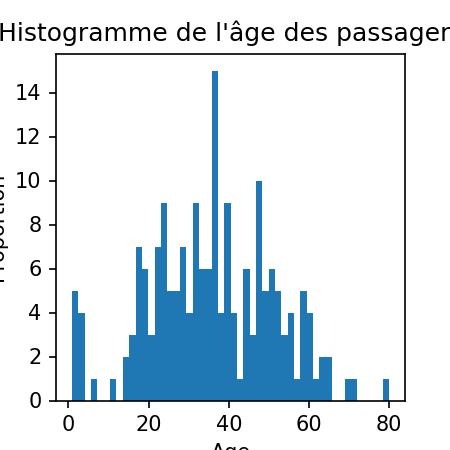

Text(0.5,1,"Histogramme de l'âge des passagers")

In [28]:
plt.figure(figsize=(3,3))
plt.hist(df_titanic['Age'], density=False,bins=50)
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.title("Histogramme de l'âge des passagers")

<IPython.core.display.Javascript object>


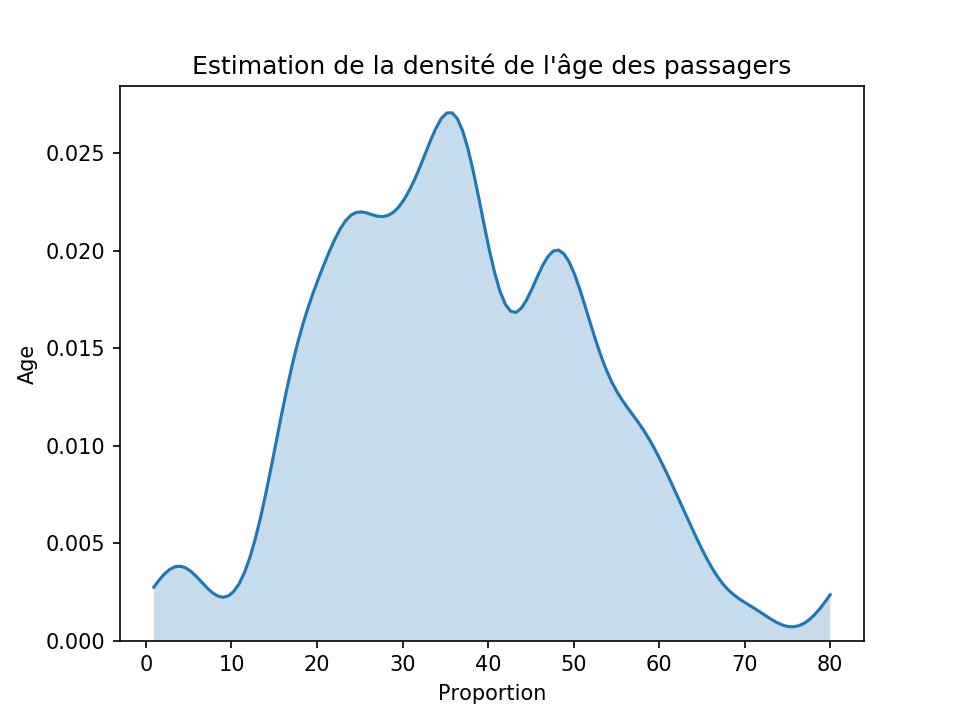

Text(0.5,1,"Estimation de la densité de l'âge des passagers")

In [26]:
plt.figure()
ax = sns.kdeplot(df_titanic['Age'], shade=True, cut=0, bw=3)
plt.xlabel('Proportion')
plt.ylabel('Age')
ax.legend().set_visible(False)
plt.title("Estimation de la densité de l'âge des passagers")

In [29]:
ax = sns.kdeplot

** Comment le taux de survie des passagers diffère-t-il entre les sexes?**

In [31]:
df_titanic_raw.groupby('Sex')[['Survived']].aggregate(lambda x: x.mean())

,Survived
Sex,
female,0.742038
male,0.188908


** Ou en quoi diffère-t-il entre les différentes classes? **

In [36]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<IPython.core.display.Javascript object>


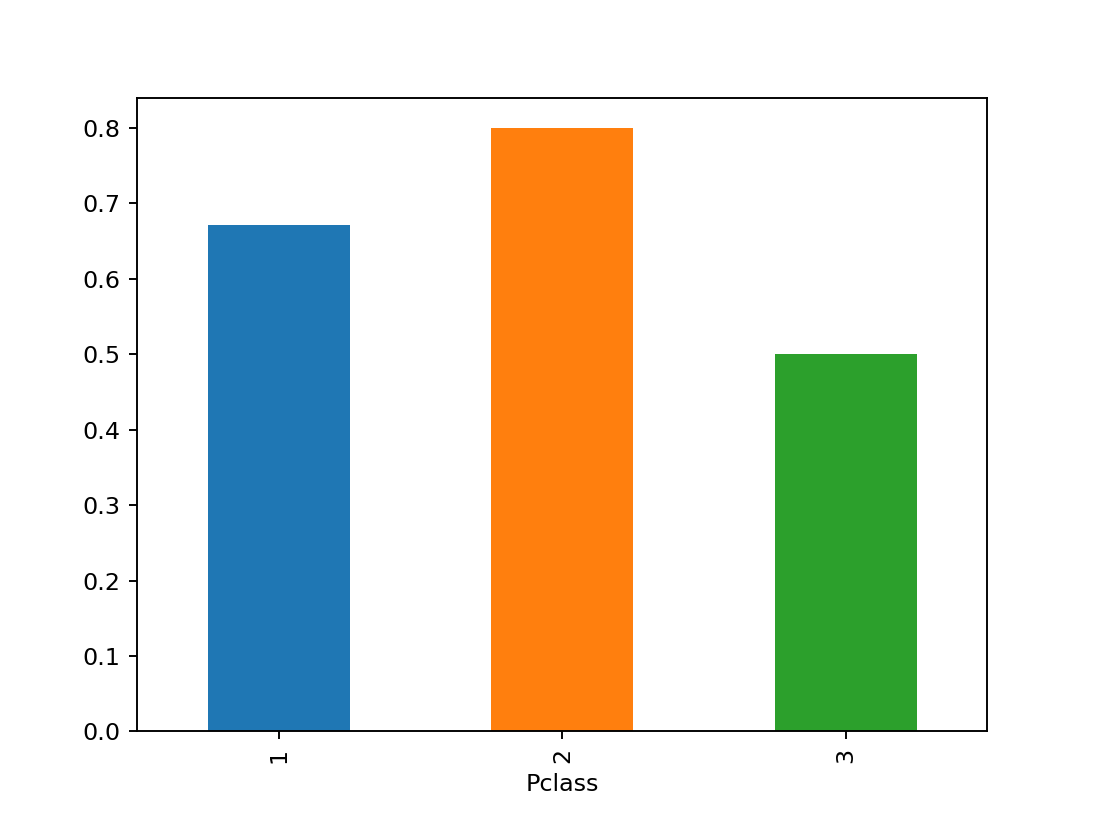

In [51]:
plt.figure()
df_titanic.groupby('Pclass')['Survived'].aggregate(lambda x: x.mean()).plot(kind='bar')


<IPython.core.display.Javascript object>


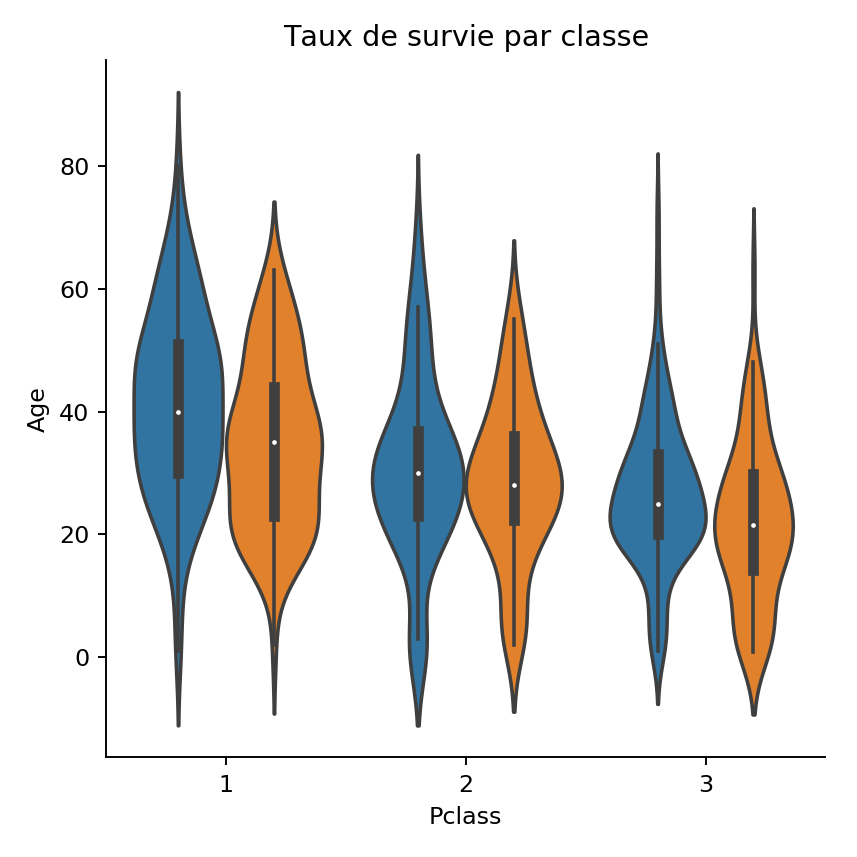

/home/jo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [53]:
sns.catplot(x=df_titanic_raw.columns[2], y="Age",
            hue="Sex", data=df_titanic_raw, kind="violin", legend=False)
plt.title("Taux de survie par classe")
plt.legend?
plt.tight_layout()

## Cas 2:  qualité de l'air

In [54]:
url = "http://josephsalmon.eu/enseignement/datasets/20080421_20160927-PA13_auto.csv"
path_target = "./20080421_20160927-PA13_auto.csv"
download(url, path_target, replace=False)

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


'./20080421_20160927-PA13_auto.csv'

# Traitement des données temporelles et dates: 
https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

In [81]:
polution_df = pd.read_csv('20080421_20160927-PA13_auto.csv', sep=';',
                          comment='#', na_values="n/d",
                          converters={'heure': str})
# check issues with 24:00:
# https://www.tutorialspoint.com/python/time_strptime.htm


# Pré-traitement:
polution_df['heure'] = polution_df['heure'].replace('24', '0')
time_improved = pd.to_datetime(polution_df['date'] +
                               ' ' + polution_df['heure'] + ':00',
                               format='%d/%m/%Y %H:%M')

polution_df['DateTime'] = time_improved
del polution_df['heure']
del polution_df['date']

polution_ts = polution_df.set_index(['DateTime'])
polution_ts = polution_ts.sort_index()
polution_ts.head()

,NO2,O3
DateTime,,
2008-04-21 00:00:00,28.0,36.0
2008-04-21 01:00:00,13.0,74.0
2008-04-21 02:00:00,11.0,73.0
2008-04-21 03:00:00,13.0,64.0
2008-04-21 04:00:00,23.0,46.0


In [56]:
## Pollution sur Paris au cours des années, Source: Airparif
polution_ts.describe()

,NO2,O3
count,71008.000000,71452.000000
mean,34.453414,39.610046
std,20.380702,28.837333
min,1.000000,0.000000
25%,19.000000,16.000000
50%,30.000000,38.000000
75%,46.000000,58.000000
max,167.000000,211.000000


<IPython.core.display.Javascript object>


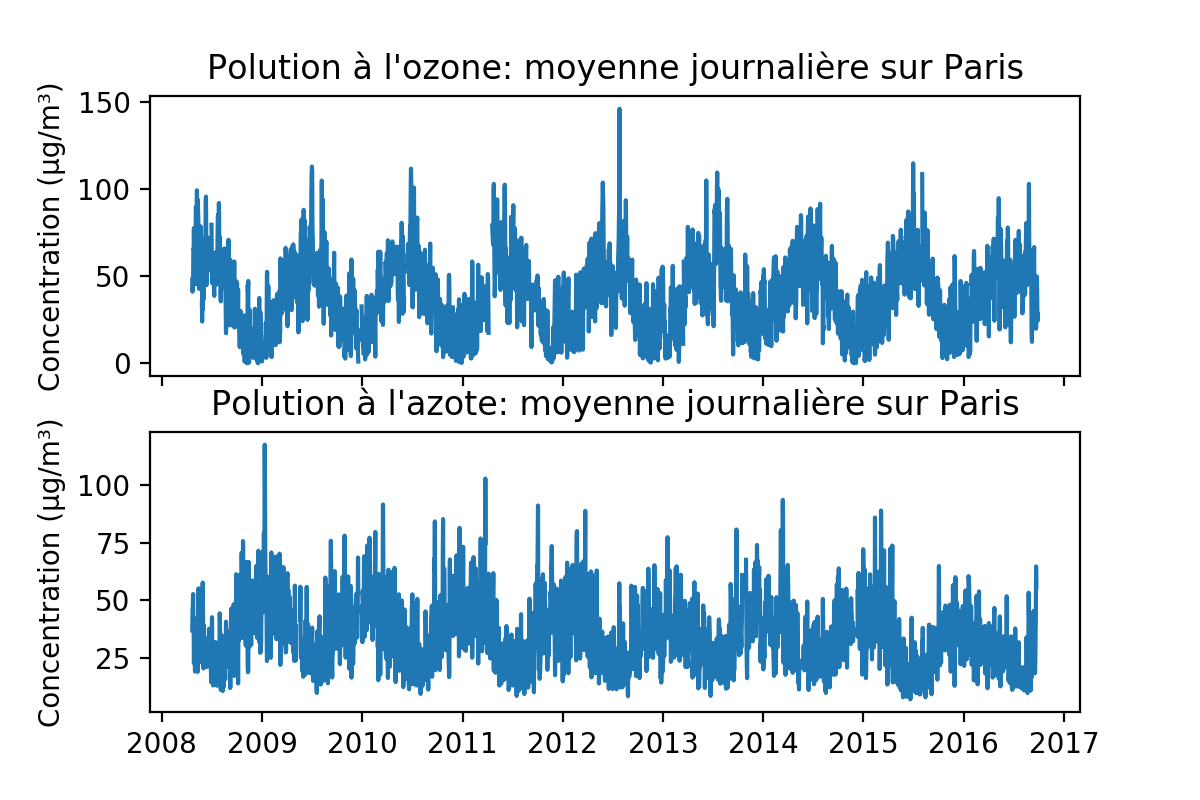

In [61]:
fig, axes = plt.subplots(2, 1, figsize=(6, 4), sharex=True)

axes[0].plot(polution_ts['O3'].resample('D').mean())
axes[0].set_title("Polution à l'ozone: moyenne journalière sur Paris")
axes[0].set_ylabel("Concentration (µg/m³)")

axes[1].plot(polution_ts['NO2'].resample('D').mean())
axes[1].set_title("Polution à l'azote: moyenne journalière sur Paris")
axes[1].set_ylabel("Concentration (µg/m³)")

plt.show()

** La pollution atmosphérique montre-t-elle une tendance à la baisse au fil des ans?**

<IPython.core.display.Javascript object>


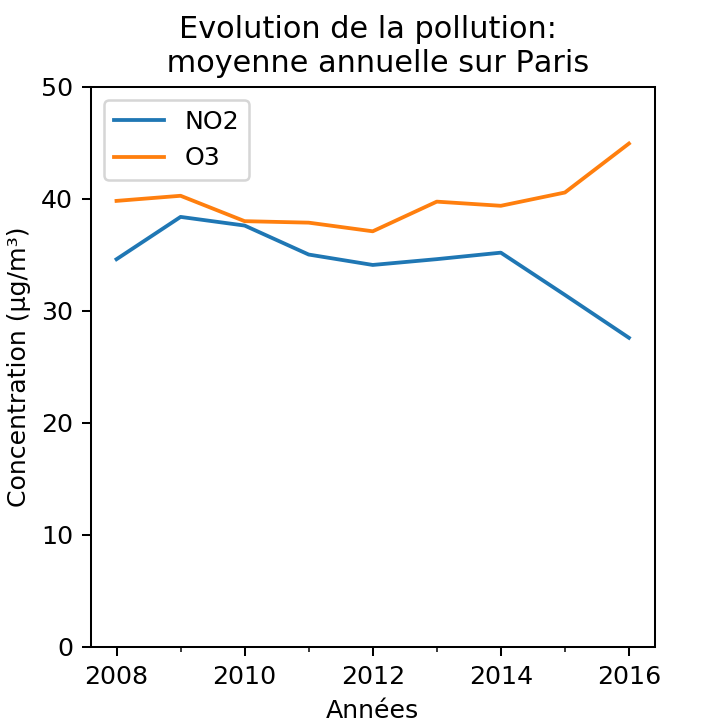

Text(0.5,0,'Années')

In [64]:
ax = polution_ts['2008':].resample('A').mean().plot(figsize=(4,4))  # échantillone par année (A pour Annual)
plt.ylim(0,50)
plt.title("Evolution de la pollution: \n moyenne annuelle sur Paris")
plt.ylabel("Concentration (µg/m³)")
plt.xlabel("Années")

In [65]:
# Chargement des couleurs
sns.set_palette("GnBu_d", n_colors=7)
polution_ts['weekday'] = polution_ts.index.weekday  # Monday=0, Sunday=6

# polution_ts['weekend'] = polution_ts['weekday'].isin([5, 6])

days = ['Lundi', 'Mardi', 'Mercredi',
        'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']

polution_week_no2 = polution_ts.groupby(['weekday', polution_ts.index.hour])[
    'NO2'].mean().unstack(level=0)
polution_week_03 = polution_ts.groupby(['weekday', polution_ts.index.hour])[
    'O3'].mean().unstack(level=0)

Int64Index([4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
            ...
            9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
           dtype='int64', name='DateTime', length=73920)

<IPython.core.display.Javascript object>


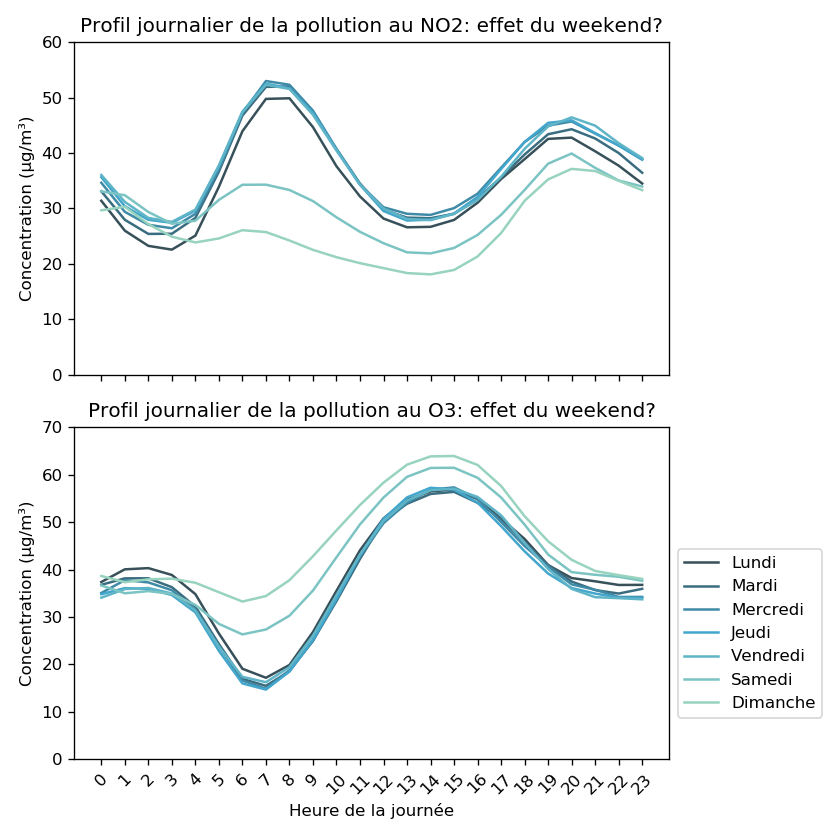

In [76]:
fig, axes = plt.subplots(2, 1, figsize=(7, 7), sharex=True)

polution_week_no2.plot(ax=axes[0])
axes[0].set_ylabel("Concentration (µg/m³)")
axes[0].set_xlabel("Heure de la journée")
axes[0].set_title(
    "Profil journalier de la pollution au NO2: effet du weekend?")
axes[0].set_xticks(np.arange(0, 24))
axes[0].set_xticklabels(np.arange(0, 24), rotation=45)
axes[0].set_ylim(0, 60)

polution_week_03.plot(ax=axes[1])
axes[1].set_ylabel("Concentration (µg/m³)")
axes[1].set_xlabel("Heure de la journée")
axes[1].set_title("Profil journalier de la pollution au O3: effet du weekend?")
axes[1].set_xticks(np.arange(0, 24))
axes[1].set_xticklabels(np.arange(0, 24), rotation=45)
axes[1].set_ylim(0, 70)
axes[0].legend().set_visible(False)
# ax.legend()
axes[1].legend(labels=days, loc='lower left', bbox_to_anchor=(1, 0.1))

plt.tight_layout()

In [17]:
# XXX TODO quid des saisons?

In [82]:
import calendar
polution_ts['month'] = polution_ts.index.month  # Janvier=0, .... Decembre=12
polution_ts['month'] = polution_ts['month'].apply(lambda x: calendar.month_abbr[x])
polution_ts.head()

,NO2,O3,month
DateTime,,,
2008-04-21 00:00:00,28.0,36.0,Apr
2008-04-21 01:00:00,13.0,74.0,Apr
2008-04-21 02:00:00,11.0,73.0,Apr
2008-04-21 03:00:00,13.0,64.0,Apr
2008-04-21 04:00:00,23.0,46.0,Apr


In [107]:
days = []

polution_month_no2 = polution_ts.groupby(['month', polution_ts.index.hour])[
    'NO2'].mean().unstack(level=0)
polution_month_03 = polution_ts.groupby(['month', polution_ts.index.hour])[
    'O3'].mean().unstack(level=0)

<IPython.core.display.Javascript object>


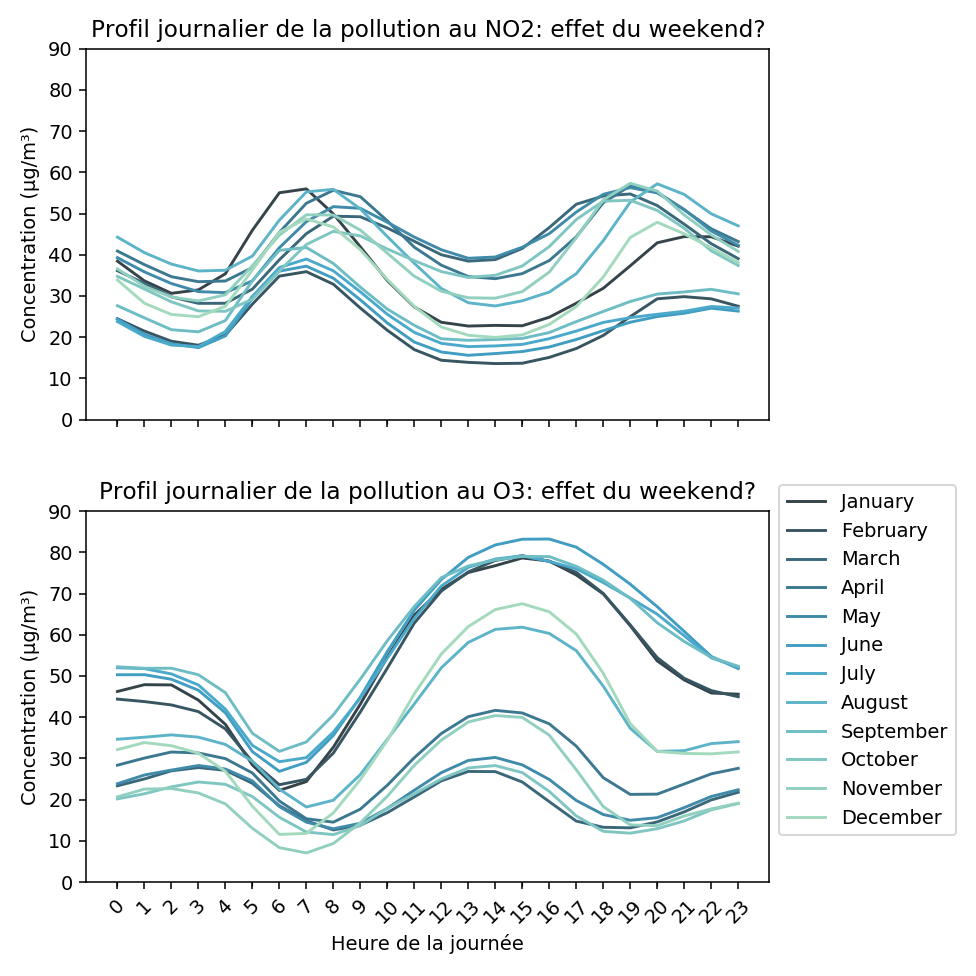

In [113]:
sns.set_palette("GnBu_d", n_colors=12)

fig, axes = plt.subplots(2, 1, figsize=(7, 7), sharex=True)

polution_month_no2.plot(ax=axes[0])
axes[0].set_ylabel("Concentration (µg/m³)")
axes[0].set_xlabel("Heure de la journée")
axes[0].set_title(
    "Profil journalier de la pollution au NO2: effet du weekend?")
axes[0].set_xticks(np.arange(0, 24))
axes[0].set_xticklabels(np.arange(0, 24), rotation=45)
axes[0].set_ylim(0, 90)

polution_month_03.plot(ax=axes[1])
axes[1].set_ylabel("Concentration (µg/m³)")
axes[1].set_xlabel("Heure de la journée")
axes[1].set_title("Profil journalier de la pollution au O3: effet du weekend?")
axes[1].set_xticks(np.arange(0, 24))
axes[1].set_xticklabels(np.arange(0, 24), rotation=45)
axes[1].set_ylim(0, 90)
axes[0].legend().set_visible(False)
# ax.legend()
axes[1].legend(labels=calendar.month_name[1:], loc='lower left', bbox_to_anchor=(1, 0.1))

plt.tight_layout()

# Pandas: anlayser des données avec Python 

Pour les travaux intensifs en données en Python, la bibliothèque Pandas est devenue essentielle.

Qu'est ce que pandas? C'est un environnement qui gère des Data Frame:

- Pandas peut gérer *Data Frame* des tableaux *numpy* avec des étiquettes pour les lignes et les colonnes, et permet une prise en charge des types de données hétérogènes.
- Pandas peut aussi être considéré comme le data.frame de R en Python.
- Puissant pour travailler avec les données manquantes, travailler avec des données chronologiques, pour lire et écrire vos données, pour remodeler, regrouper, fusionner vos données, ...

Documentation: http://pandas.pydata.org/pandas-docs/stable/

Quand a-t-on besoin de Pandas?
Quand on travaille avec des tableaux ou des structures de données(commme des dataframe R, SQL table, Excel, Spreadsheet, ...):

- Importer des données
- Nettoyer des données "sales" 
- Explorer et comprendre des données
- Traiter et preparer les données pour faire une analyse 
- Analyser les données (avec en plus scikit-learn, statsmodels,...)
<br/>
<br/>

**ATTENTION / LIMITES:**

Pandas est bon pour travailler avec des données hétérogènes et des tableaux 1D/2D, mais tous les types de données ne correspondent pas à ces structures!

Contre-exemples:
- Quand on travaille avec des données de type **array** (e.g. images):  utiliser *numpy*
- Pour des données multidimensionnelles étiquetées  (e.g. données de climat): voir [xarray](http://xarray.pydata.org/en/stable/)

# Les structures de données en pandas : DataFrame et Series

Un DataFrame est une structure de données tabulaire (un objet multidimensionnel pouvant contenir des données étiquetées) composé de lignes et de colonnes, semblable à une feuille de calcul, une table de base de données ou à l'objet data.frame de R. Vous pouvez le considérer comme plusieurs objets Series partageant le même index.

In [18]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
df_titanic.index

Int64Index([  1,   3,   6,  10,  11,  21,  23,  27,  52,  54,
            ...
            835, 853, 857, 862, 867, 871, 872, 879, 887, 889],
           dtype='int64', length=183)

In [119]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
                ...   
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Length: 12, dtype: object

In [121]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
PassengerId    183 non-null int64
Survived       183 non-null int64
Pclass         183 non-null int64
Name           183 non-null object
Sex            183 non-null object
Age            183 non-null float64
SibSp          183 non-null int64
Parch          183 non-null int64
Ticket         183 non-null object
Fare           183 non-null float64
Cabin          183 non-null object
Embarked       183 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 23.6+ KB


In [23]:
# on voit que c'est la variable cabine qui n'est pas bien renseigné, suit après l'âge
df_titanic_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [140]:
array_titanic = df_titanic.values  # c'est la liste de valeur /array associé
array_titanic

array([[2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [4, 1, 1, ..., 53.1, 'C123', 'S'],
       [7, 0, 1, ..., 51.8625, 'E46', 'S'],
       ...,
       [880, 1, 1, ..., 83.1583, 'C50', 'C'],
       [888, 1, 1, ..., 30.0, 'B42', 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C']], dtype=object)

# Données uni-dimensionel : Series (une colonne d'un DataFrame)

Une Series est un support de base pour les données étiquetées unidimensionnelles.

In [25]:
fare = df_titanic['Fare']

In [26]:
fare

1      71.2833
3      53.1000
6      51.8625
10     16.7000
        ...   
872     5.0000
879    83.1583
887    30.0000
889    30.0000
Name: Fare, Length: 183, dtype: float64

## Attributs de l'objet *Series*: indices et valeurs

In [27]:
fare.values[:10]

array([ 71.2833,  53.1   ,  51.8625,  16.7   ,  26.55  ,  13.    ,
        35.5   , 263.    ,  76.7292,  61.9792])

In [28]:
fare[6] # existe mais fare[0] provoque une erreur, car on l'a enlevé du dataFrame, comme valeur manquante.


51.8625

Contrairement au tableau *numpy*, cet index peut être autre chose qu'un entier:

In [142]:
df_titanic = df_titanic.set_index('Name')
df_titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,38.0,1,0,PC 17599,71.2833,C85,C
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,35.0,1,0,113803,53.1000,C123,S
"McCarthy, Mr. Timothy J",7,0,1,54.0,0,0,17463,51.8625,E46,S
"Sandstrom, Miss. Marguerite Rut",11,1,3,4.0,1,1,PP 9549,16.7000,G6,S
...,...,...,...,...,...,...,...,...,...,...
"Carlsson, Mr. Frans Olof",873,0,1,33.0,0,0,695,5.0000,B51 B53 B55,S
"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",880,1,1,56.0,0,1,11767,83.1583,C50,C
"Graham, Miss. Margaret Edith",888,1,1,19.0,0,0,112053,30.0000,B42,S
"Behr, Mr. Karl Howell",890,1,1,26.0,0,0,111369,30.0000,C148,C


In [144]:
age = df_titanic['Age']
age['Behr, Mr. Karl Howell']

26.0

In [31]:
age.mean()

35.6744262295082

In [146]:
df_titanic[age <2]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,
"Becker, Master. Richard F",184,1,2,1.00,2,1,230136,39.00,F4,S
"Allison, Master. Hudson Trevor",306,1,1,0.92,1,2,113781,151.55,C22 C26,S


In [148]:
df_titanic_raw['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [151]:
pd.options.display.max_rows = 70
df_titanic[df_titanic['Embarked']=='C']  # Les passagers montés à Cherbourg n'ont pas des noms gaulois...

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,38.0,1,0,PC 17599,71.2833,C85,C
"Harper, Mrs. Henry Sleeper (Myna Haxtun)",53,1,1,49.0,1,0,PC 17572,76.7292,D33,C
"Ostby, Mr. Engelhart Cornelius",55,0,1,65.0,0,1,113509,61.9792,B30,C
"Goldschmidt, Mr. George B",97,0,1,71.0,0,0,PC 17754,34.6542,A5,C
"Greenfield, Mr. William Bertram",98,1,1,23.0,0,1,PC 17759,63.3583,D10 D12,C
"Baxter, Mr. Quigg Edmond",119,0,1,24.0,0,1,PC 17558,247.5208,B58 B60,C
"Giglio, Mr. Victor",140,0,1,24.0,0,0,PC 17593,79.2000,B86,C
"Smith, Mr. James Clinch",175,0,1,56.0,0,0,17764,30.6958,A7,C
"Isham, Miss. Ann Elizabeth",178,0,1,50.0,0,0,PC 17595,28.7125,C49,C


In [152]:
pd.options.display.max_rows = 8

In [157]:
df_titanic_raw['Survived'].sum() / df_titanic_raw['Survived'].count()

0.3838383838383838

In [160]:
df_titanic['Survived'].mean()

0.6721311475409836

** Quelle était la proportion de femmes sur le bateau? **

In [166]:
df_titanic_raw.groupby(['Sex']).size() / df_titanic_raw['Sex'].count()

Sex
female    0.352413
male      0.647587
dtype: float64

In [165]:
df_titanic_raw.groupby(['Sex']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


# Data import et export

Pandas supports nativement une large gamme de formats d'entrée / sortie:
- CSV, text
- SQL database
- Excel
- HDF5
- json
- html
- pickle
- sas, stata
- ...

In [39]:
# pd.read_csv?

# Exploration

In [40]:
df_titanic_raw.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [41]:
df_titanic_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<IPython.core.display.Javascript object>


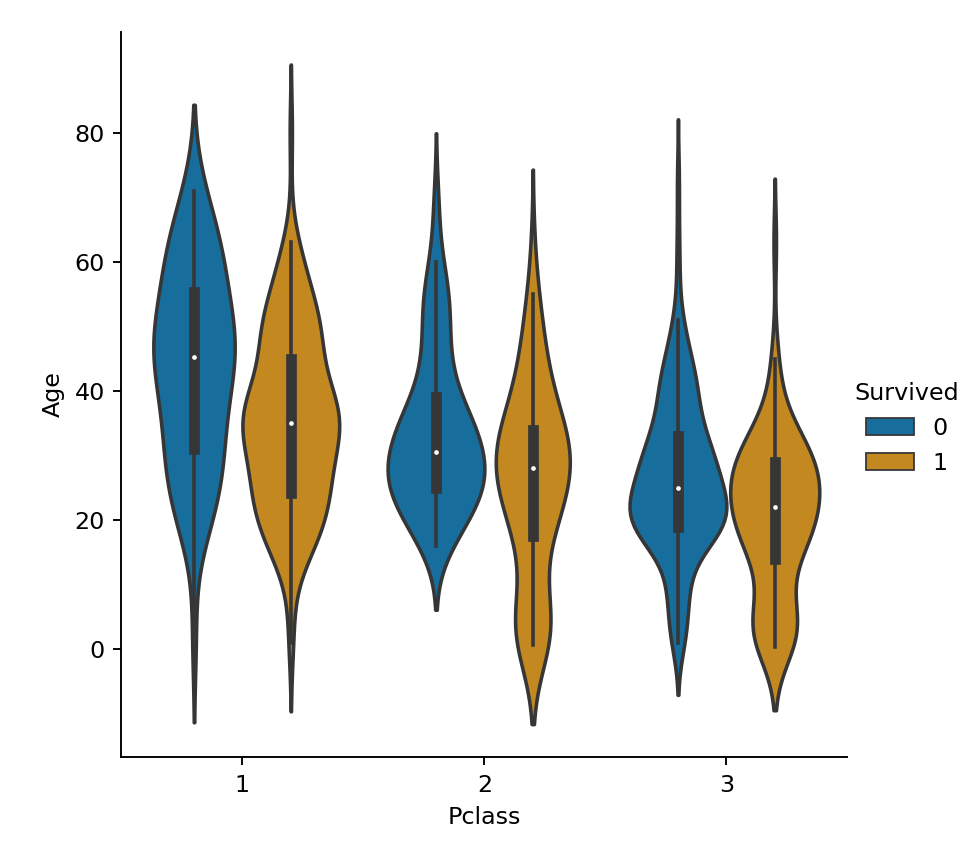

/home/jo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [169]:
sns.set_palette("colorblind")
sns.catplot(x='Pclass',y='Age',hue='Survived',data=df_titanic_raw, kind="violin")

In [43]:
df_titanic_raw.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# iloc

In [44]:
df_titanic.iloc[0:2,1:8]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket
Name,,,,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1,female,38.0,1,0,PC 17599
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,female,35.0,1,0,113803


# loc

In [172]:
df_titanic.loc['Bonnell, Miss. Elizabeth', 'Fare']

26.55

In [46]:
df_titanic.loc['Bonnell, Miss. Elizabeth']

PassengerId        12
Survived            1
Pclass              1
Sex            female
                ...  
Ticket         113783
Fare            26.55
Cabin            C103
Embarked            S
Name: Bonnell, Miss. Elizabeth, Length: 11, dtype: object

In [47]:
df_titanic.loc['Bonnell, Miss. Elizabeth','Survived']= 100

In [48]:
df_titanic.loc['Bonnell, Miss. Elizabeth']

PassengerId        12
Survived          100
Pclass              1
Sex            female
                ...  
Ticket         113783
Fare            26.55
Cabin            C103
Embarked            S
Name: Bonnell, Miss. Elizabeth, Length: 11, dtype: object

In [49]:
df_titanic.loc['Bonnell, Miss. Elizabeth','Survived']= 1  # On remet la valeur comme avant 

# L'opération group-by:

In [173]:
df_titanic.groupby('Sex').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,467.221519,0.670886,37.591266,0.487342,0.468354,88.683228
2,343.266667,0.800000,25.266667,0.400000,0.400000,18.444447
3,436.200000,0.500000,21.000000,0.200000,0.700000,11.027500


In [51]:
df_titanic_raw.groupby('Sex').mean()['Pclass']  # attention ici on prend toutes les données, meme les manquantes...

Sex
female    2.159236
male      2.389948
Name: Pclass, dtype: float64

In [175]:
df_titanic['AgeClass'] = pd.cut(df_titanic['Age'], bins=np.arange(0,90,10)) # créer des classes / découpes.

In [176]:
df_titanic['AgeClass']

Name
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    (30, 40]
Futrelle, Mrs. Jacques Heath (Lily May Peel)           (30, 40]
McCarthy, Mr. Timothy J                                (50, 60]
Sandstrom, Miss. Marguerite Rut                         (0, 10]
                                                         ...   
Carlsson, Mr. Frans Olof                               (30, 40]
Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)          (50, 60]
Graham, Miss. Margaret Edith                           (10, 20]
Behr, Mr. Karl Howell                                  (20, 30]
Name: AgeClass, Length: 183, dtype: category
Categories (8, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80]]